In [291]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
sns.set(font='Arial')

In [262]:
df = pd.read_csv('..\\data\\pareto\\sales_act.csv',index_col=0)
df=df.join(pd.read_csv('..\\data\\pareto\\sales_sa.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_act.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_sa.csv',index_col=0))

df.index=df.index.rename('Date')
df=df.asfreq('QS-OCT')

<AxesSubplot:title={'center':'New Listings'}, xlabel='Date'>

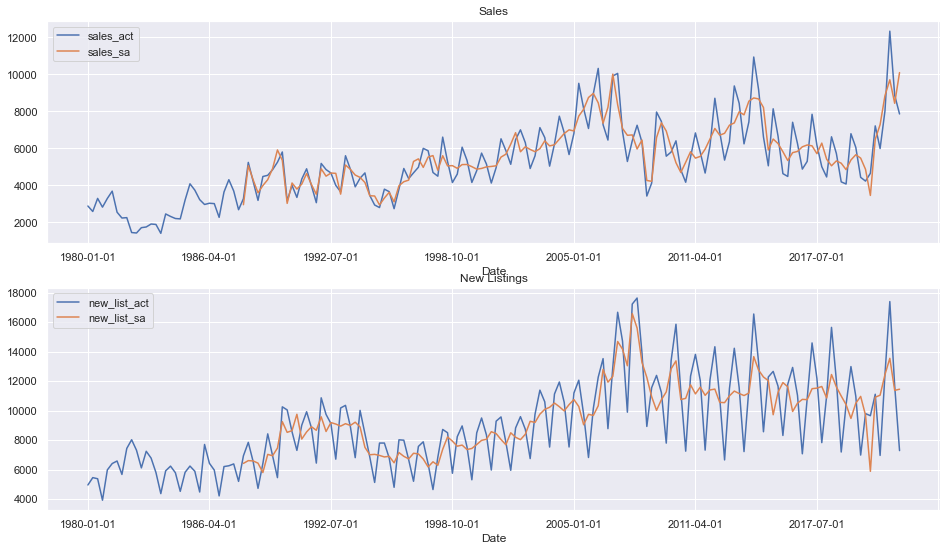

In [228]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,9))

df[['sales_act','sales_sa']].plot(ax=ax[0],title='Sales')
df[['new_list_act','new_list_sa']].plot(ax=ax[1],title='New Listings')


In [232]:
real_income = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealDisposableIncome',engine='openpyxl',index_col=0)[['AB']]
real_income.rename({'AB':'RealDisposableIncome'},axis=1,inplace=True)

real_gdp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealGDP',engine='openpyxl',index_col=0)[['AB']]
real_gdp.rename({'AB':'RealGDP'},axis=1,inplace=True)

unemp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Unemployment',engine='openpyxl',index_col=0)[['AB']]
unemp.rename({'AB':'Unemployment'},axis=1,inplace=True)

employment = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Employment',engine='openpyxl',index_col=0)[['AB']]
employment.rename({'AB':'Employment'},axis=1,inplace=True)

cpi = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='CPI',engine='openpyxl',index_col=0,header=1)[['AB']]
cpi.rename({'AB':'CPI'},axis=1,inplace=True)

prov_econ=real_gdp.join(real_income)
prov_econ=prov_econ.join(unemp)
prov_econ=prov_econ.join(employment)
prov_econ=prov_econ.join(cpi)
prov_econ.index=prov_econ.index.rename('Date')
prov_econ.index=pd.PeriodIndex(prov_econ.index,freq='Q').to_timestamp()


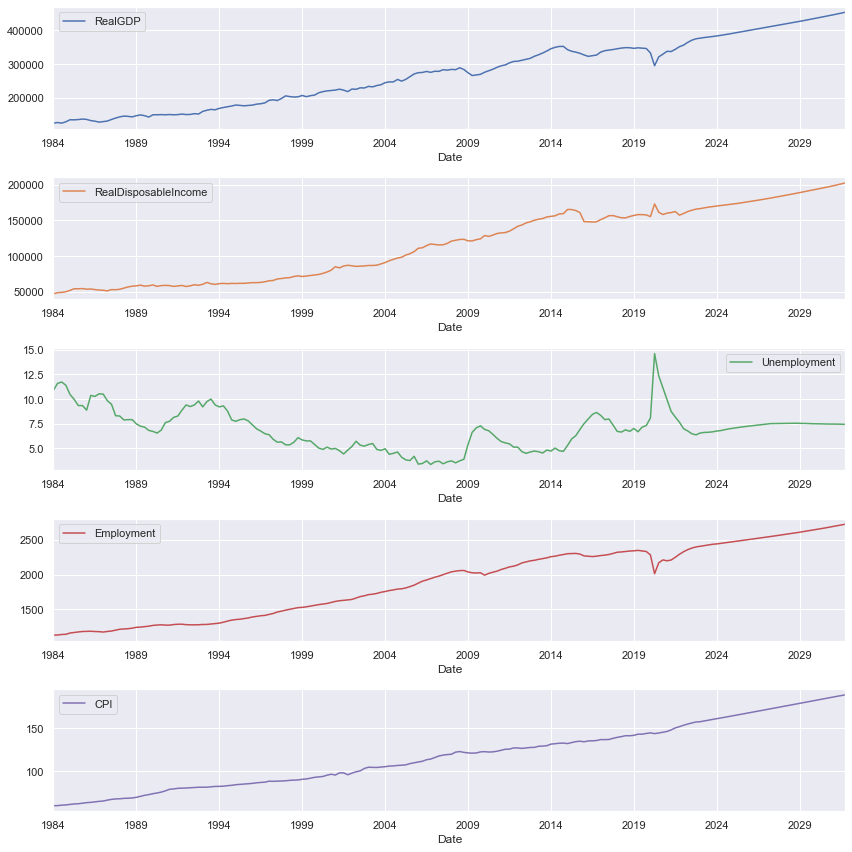

In [233]:

fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(12,12))
prov_econ.plot(ax=ax,subplots=True)
plt.tight_layout()

In [231]:
prov_econ

,RealGDP,RealDisposableIncome,Unemployment,Employment,CPI
Date,,,,,
1984-01-01,124537.696000,47427.905649,10.900000,1131.646718,59.343473
1984-04-01,126432.684000,49015.069966,11.600000,1132.964409,59.518123
1984-07-01,124688.800000,49448.102005,11.733333,1140.598043,60.048126
1984-10-01,128648.819000,50330.216996,11.400000,1143.396344,60.322322
1985-01-01,134650.900000,52204.214947,10.466667,1161.538977,60.899252
...,...,...,...,...,...
2030-10-01,443518.991283,196865.076648,7.449761,2681.132009,185.766696
2031-01-01,446062.788990,198131.541324,7.450970,2691.908079,186.652715
2031-04-01,448636.526604,199487.861585,7.444424,2702.917741,187.527261


In [348]:
nat_econ=pd.read_excel('../data/BaselineNationalForecasts.xlsx',header=1,index_col=0,engine='openpyxl',sheet_name='Quarterly')[3:-11]
energy = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='Energy',header=0,index_col=0,engine='openpyxl')
covid = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='COVID',header=0,index_col=0,engine='openpyxl')

In [349]:
nat_econ.index = nat_econ.index.str.replace(' ','')
nat_econ.index=nat_econ.index.rename('Date')
nat_econ.index=pd.PeriodIndex(nat_econ.index,freq='Q').to_timestamp()
energy.index = energy.index.str.replace(' ','')
energy.index=energy.index.rename('Date')
energy.index=pd.PeriodIndex(energy.index,freq='Q').to_timestamp()
covid.index = covid.index.str.replace(' ','')
covid.index=covid.index.rename('Date')
covid.index=pd.PeriodIndex(covid.index,freq='Q').to_timestamp()


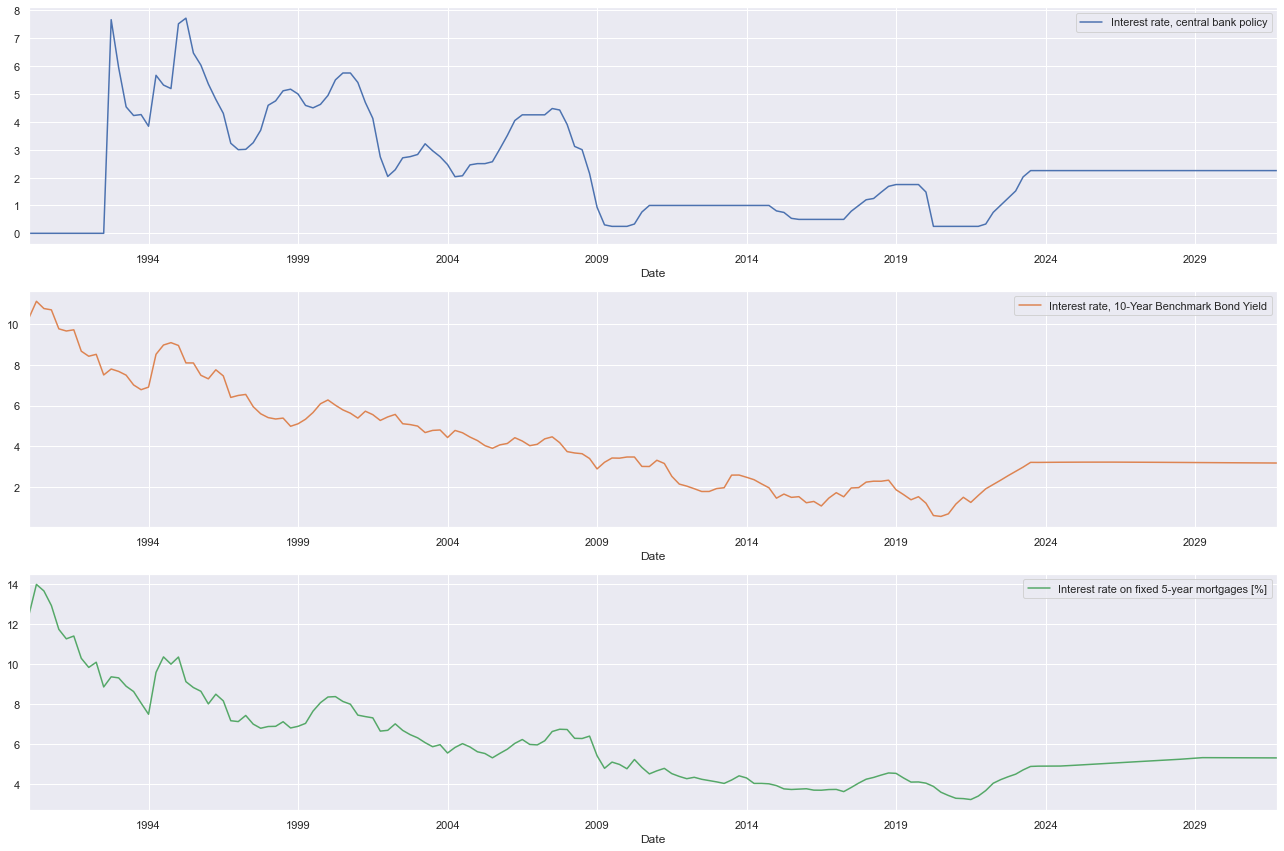

In [162]:

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,12))
nat_econ['1990':][['Interest rate, central bank policy','Interest rate, 10-Year Benchmark Bond Yield','Interest rate on fixed 5-year mortgages [%]']].plot(ax=ax,subplots=True)
plt.tight_layout()

In [163]:
nat_econ['2019':'2024']

,"GDP, real, LCU",Unemployment rate,Consumer price index,"Employment, total","Income, personal disposable, real, LCU","Interest rate, central bank policy","Interest rate, 10-Year Benchmark Bond Yield",Interest rate on fixed 5-year mortgages [%],"Corporate borrowing rate, period average","World oil price, Brent crude spot, $pb",World Price Oil (West Texas Intermediate),"World oil price, Western Canada Select (WCS) crude, $pb"
Date,,,,,,,,,,,,
2019-01-01,520093,5.76667,134.733,18926.5,293685,1.75,1.85774,4.51667,3.69385,63.17,54.85,44.1
2019-04-01,525653,5.56667,135.833,19047.7,296699,1.75,1.62032,4.28667,3.53769,68.9233,59.7867,47.44
2019-07-01,528030,5.63333,136.367,19102,299153,1.75,1.36524,4.08,3.47385,61.93,56.4067,43.81
2019-10-01,528528,5.7,136.933,19124.5,301721,1.75,1.51564,4.08667,3.53077,63.41,56.9133,37.86
2020-01-01,518632,6.3,137.1,18842.4,304934,1.48077,1.19762,4.02667,3.38154,50.44,45.84,29.08
2020-04-01,459951,13,135.967,16695.6,341020,0.25,0.59,3.86333,2.72308,29.3433,27.8267,19.74
2020-07-01,500771,10.0333,136.967,18135.8,328187,0.25,0.545714,3.57333,2.39461,42.9633,40.8867,31.212
2020-10-01,508326,8.66667,137.933,18574,321462,0.25,0.673871,3.41,2.29615,44.29,42.5067,31.51
2021-01-01,505411,9.23155,138.433,18451.8,321300,0.25,1.15193,3.27,2.28207,51.1619,48.5638,32.0522


<AxesSubplot:xlabel='Date'>

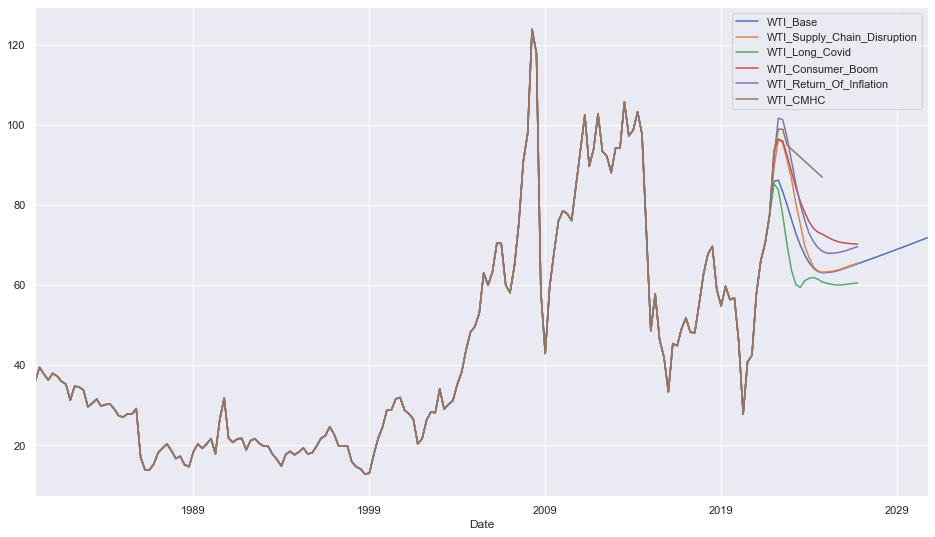

In [166]:
energy.plot(figsize=(16,9))

In [165]:
energy['2019':'2024']

,WTI_Base,WTI_Supply_Chain_Disruption,WTI_Long_Covid,WTI_Consumer_Boom,WTI_Return_Of_Inflation,WTI_CMHC
Date,,,,,,
2019-01-01,54.85000,54.85000,54.85000,54.85000,54.85000,54.85000
2019-04-01,59.78667,59.78667,59.78667,59.78667,59.78667,59.78667
2019-07-01,56.40667,56.40667,56.40667,56.40667,56.40667,56.40667
2019-10-01,56.91333,56.91333,56.91333,56.91333,56.91333,56.91333
2020-01-01,45.84000,45.84000,45.84000,45.84000,45.84000,45.84000
2020-04-01,27.82667,27.82667,27.82667,27.82667,27.82667,27.82667
2020-07-01,40.88667,40.88667,40.88667,40.88667,40.88667,40.88667
2020-10-01,42.50667,42.50667,42.50667,42.50667,42.50667,42.50667
2021-01-01,57.82333,57.82333,57.82333,57.82333,57.82333,57.82333


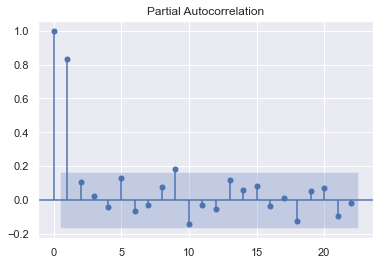

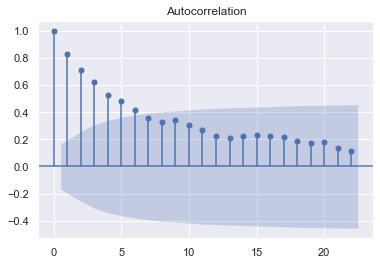

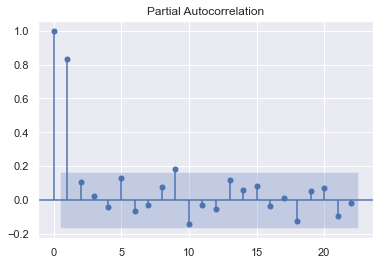

In [152]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['sales_sa']['1988':])
plot_pacf(df['sales_sa']['1988':])

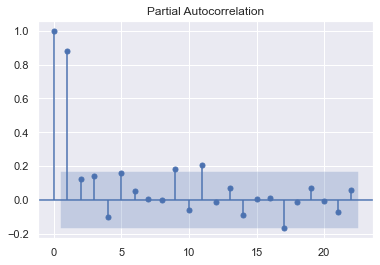

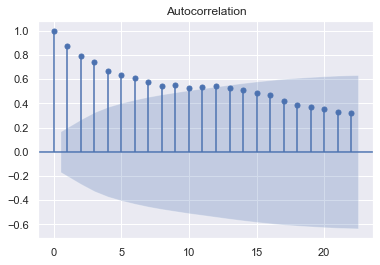

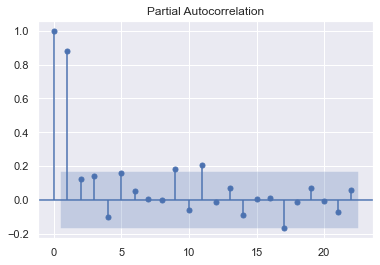

In [156]:
plot_acf(df['new_list_sa']['1988':])
plot_pacf(df['new_list_sa']['1988':])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

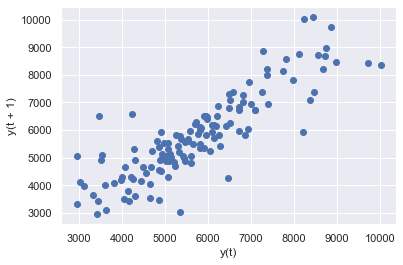

In [167]:
pd.plotting.lag_plot(df['sales_sa']['1988':])

In [169]:
df_diff = df.diff()
df_diff=df_diff.dropna()

In [171]:
df_diff

,sales_act,sales_sa,new_list_act,new_list_sa
Date,,,,
1988-04-01,1963.0,2111.0,908.0,186.0
1988-07-01,-1035.0,-766.0,-1303.0,-21.0
1988-10-01,-1019.0,-701.0,-1813.0,-151.0
1989-01-01,1291.0,392.0,1684.0,-635.0
1989-04-01,64.0,318.0,2008.0,1230.0
...,...,...,...,...
2020-10-01,-1224.0,799.0,-4143.0,138.0
2021-01-01,2032.0,1565.0,5478.0,1395.0
2021-04-01,4314.0,859.0,4943.0,1102.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

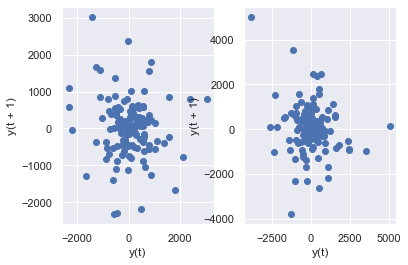

In [174]:
fig, ax =plt.subplots(nrows=1,ncols=2)
pd.plotting.lag_plot(df_diff['sales_sa']['1988':],ax=ax[0])
pd.plotting.lag_plot(df_diff['new_list_sa']['1988':],ax=ax[1])

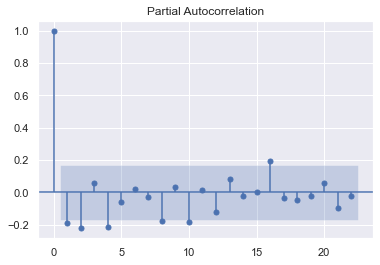

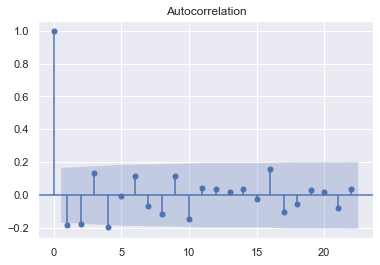

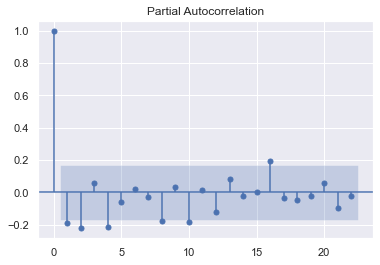

In [176]:
plot_acf(df_diff['new_list_sa']['1988':])
plot_pacf(df_diff['new_list_sa']['1988':])

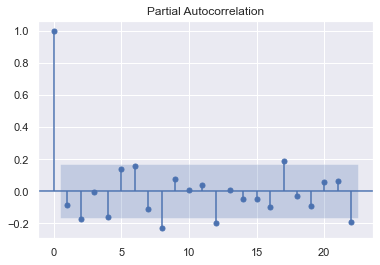

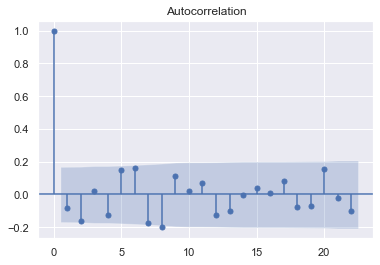

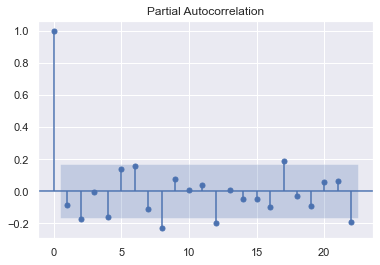

In [177]:
plot_acf(df_diff['sales_sa']['1988':])
plot_pacf(df_diff['sales_sa']['1988':])

In [289]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'mean error':me, 'mae': mae, 
            'mean percentage error': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [284]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[['sales_sa']],order=(3,0,3))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               sales_sa   No. Observations:                  168
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1091.853
Date:                Wed, 16 Feb 2022   AIC                           2199.707
Time:                        19:58:11   BIC                           2224.698
Sample:                    01-01-1980   HQIC                          2209.850
                         - 10-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5775.7006    601.128      9.608      0.000    4597.512    6953.889
ar.L1          0.8280      0.142      5.840      0.000       0.550       1.106
ar.L2         -0.6652      0.121     -5.496      0.0

In [285]:
predict=model_fit.get_prediction()
predict_ci = predict.conf_int(alpha=0.2)

In [286]:
predict_ci

,lower sales_sa,upper sales_sa
Date,,
1980-01-01,3539.367795,8012.033498
1980-04-01,3539.367795,8012.033498
1980-07-01,3539.367795,8012.033498
1980-10-01,3539.367795,8012.033498
1981-01-01,3539.367795,8012.033498
...,...,...
2020-10-01,5481.762565,7366.995777
2021-01-01,6928.182379,8813.334314
2021-04-01,7153.012069,9038.049901


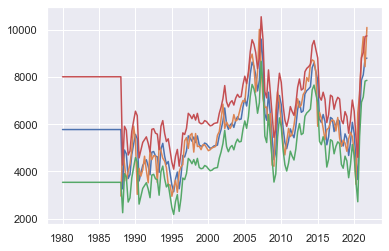

In [287]:
plt.plot(predict.predicted_mean)

plt.plot(df['sales_sa'])
plt.plot(predict_ci)



C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


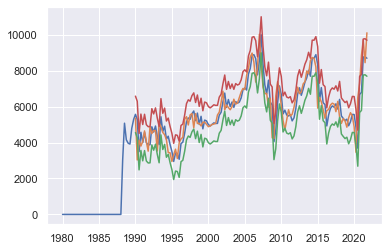

In [309]:
model = ARIMA(df[['sales_sa']],order=(6,2,1))
model_fit = model.fit()

predict=model_fit.get_prediction()
predict_ci = predict.conf_int(alpha=0.2)
plt.plot(predict.predicted_mean)

plt.plot(df['sales_sa']['1990':])
plt.plot(predict_ci['1990':])


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=7084.896487, expected=6264.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6202.117335, expected=5822.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5956.732399, expected=5348.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4969.089479, expected=5772.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5924.742695, expected=5839.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6154.529054, expected=6088.000000
predicted=6282.337789, expected=6187.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6031.914443, expected=6139.000000
predicted=5830.471041, expected=5716.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5524.472026, expected=6288.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6384.523949, expected=5418.000000
predicted=5613.825944, expected=5062.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5382.827686, expected=5326.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5451.845069, expected=5200.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5071.623088, expected=4853.000000
predicted=4752.909043, expected=5376.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5462.214277, expected=5659.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5672.036526, expected=5476.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5435.173380, expected=4869.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4992.833598, expected=3459.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3852.857188, expected=6489.000000
predicted=6312.285019, expected=7288.000000
predicted=6591.556584, expected=8853.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=7913.662842, expected=9712.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=8784.858755, expected=8441.000000
predicted=7912.850833, expected=10102.000000
Test RMSE: 1039.855


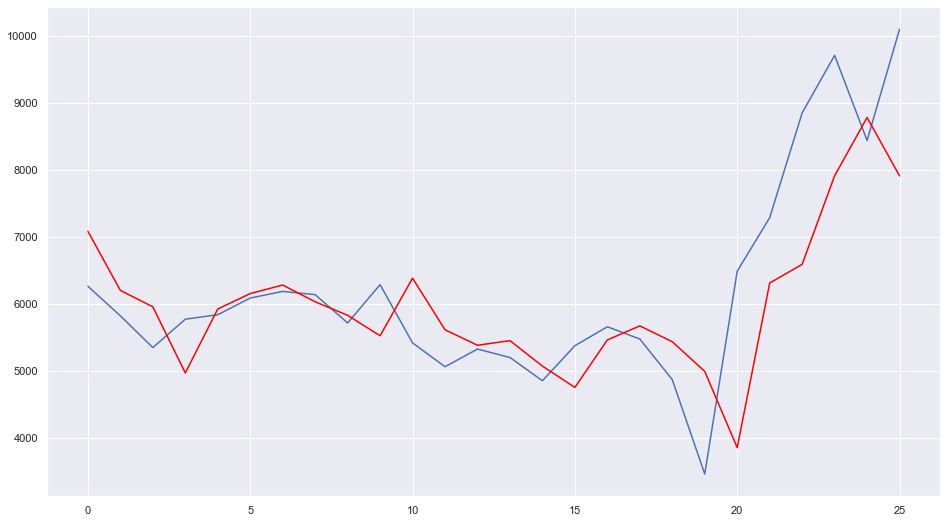

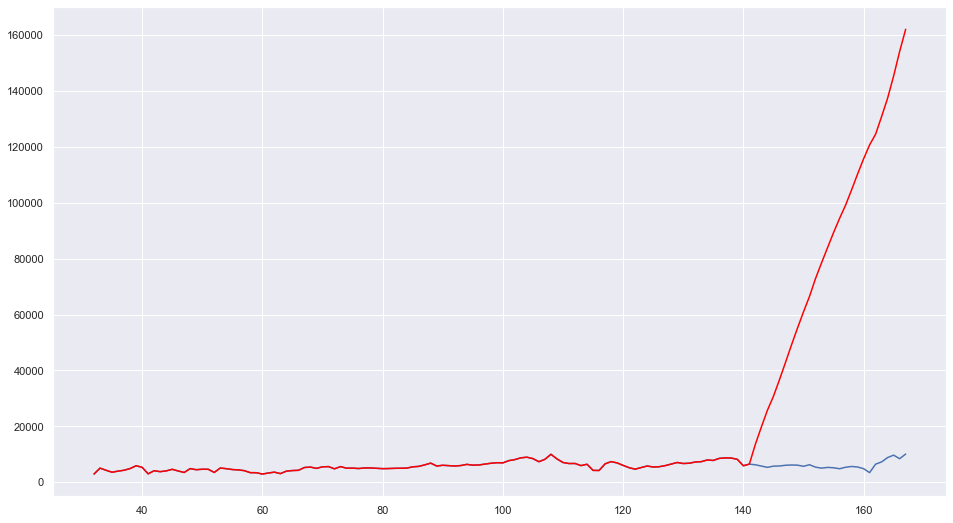

In [318]:
val = df['sales_sa'].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(3,0,3))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

plt.figure(figsize=(16,9))
plt.plot(test,label='test')
plt.plot(predictions,label='predict',color='red')

history = df['sales_sa'][:size].values
for i in predictions:
    history=np.append(history,int(history[-1]+i))
    
plt.figure(figsize=(16,9))
plt.plot(df['sales_sa'].values,label='test')
plt.plot(history,label='predict',color='red')

In [311]:
val = df['sales_sa'].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(6,2,1))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=7392.978728, expected=6264.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6304.806756, expected=5822.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6188.078543, expected=5348.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5050.397007, expected=5772.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5410.767653, expected=5839.000000
predicted=5913.714528, expected=6088.000000
predicted=6035.532922, expected=6187.000000
predicted=5976.550802, expected=6139.000000
predicted=6096.742234, expected=5716.000000
predicted=5887.854871, expected=6288.000000
predicted=6411.902560, expected=5418.000000
predicted=5485.225960, expected=5062.000000
predicted=5402.585704, expected=5326.000000
predicted=5321.153693, expected=5200.000000
predicted=5221.381142, expected=4853.000000
predicted=5029.432371, expected=5376.000000
predicted=5188.404614, expected=5659.000000
predicted=5493.671380, expected=5476.000000
predicted=5541.453023, expected=4869.000000
predicted=4905.985688, expected=3459.000000
predicted=3694.661986, expected=6489.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6647.091763, expected=7288.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6490.237311, expected=8853.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=8433.254833, expected=9712.000000
predicted=8805.121982, expected=8441.000000
predicted=8309.936958, expected=10102.000000
Test RMSE: 1005.645


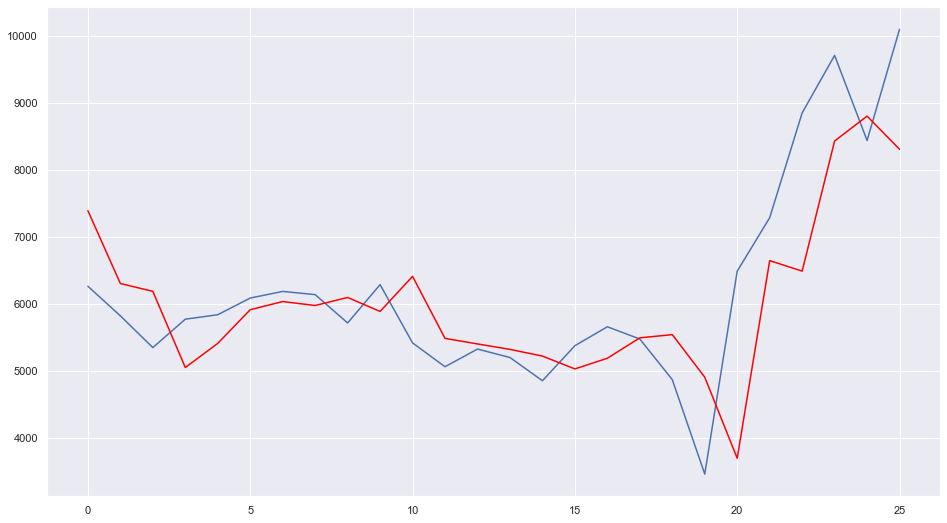

In [312]:
plt.figure(figsize=(16,9))
plt.plot(test,label='test')
plt.plot(predictions,label='predict',color='red')

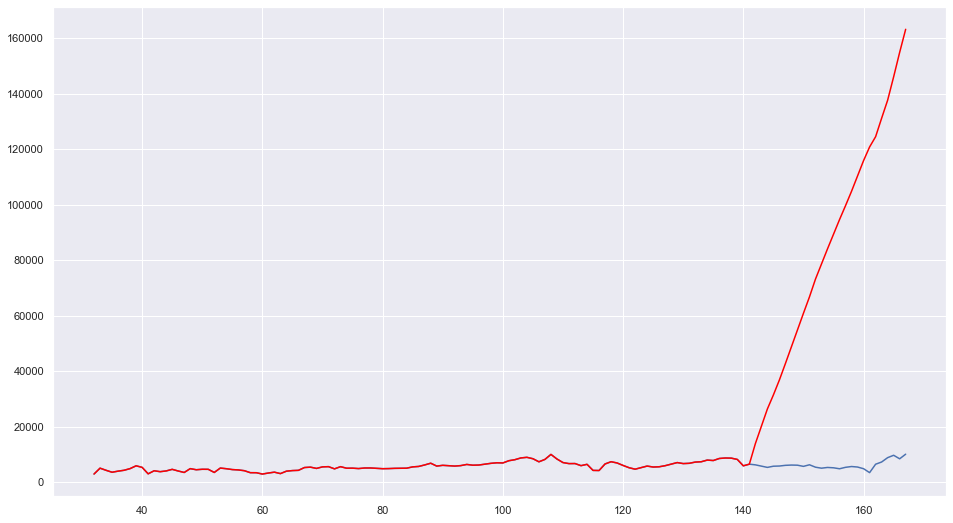

In [317]:
history = df['sales_sa'][:size].values
for i in predictions:
    history=np.append(history,int(history[-1]+i))
    
plt.figure(figsize=(16,9))
plt.plot(df['sales_sa'].values,label='test')
plt.plot(history,label='predict',color='red')

In [292]:
val = df['sales_sa'].values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = ARIMA(history,order=(3,0,3))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
out_fcast=output.summary_frame(alpha=0.3)
rmse=math.sqrt(mean_squared_error(test,out_fcast['mean']))
print('RMSE: %.3f' % rmse)


RMSE: 1946.224


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [307]:
val = df['sales_sa'].values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = ARIMA(history,order=(6,2,1))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
out_fcast=output.summary_frame(alpha=0.3)
rmse=math.sqrt(mean_squared_error(test,out_fcast['mean']))
print('RMSE: %.3f' % rmse)

RMSE: 1709.888


In [184]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

model = AutoReg(df[['sales_sa']].dropna(),3,old_names=False)
model_fit = model.fit()

print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:               sales_sa   No. Observations:                  136
Model:                     AutoReg(3)   Log Likelihood               -1069.763
Method:               Conditional MLE   S.D. of innovations            753.248
Date:                Wed, 16 Feb 2022   AIC                             13.324
Time:                        18:10:12   BIC                             13.433
Sample:                    10-01-1988   HQIC                            13.368
                         - 10-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         551.5841    281.035      1.963      0.050       0.766    1102.403
sales_sa.L1     0.8827      0.088     10.059      0.000       0.711       1.055
sales_sa.L2    -0.0965      0.116     -0.832    

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [185]:
sel = ar_select_order(df[['sales_sa']].dropna(),12,old_names=False)
sel.ar_lags
res=sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               sales_sa   No. Observations:                  136
Model:                     AutoReg(1)   Log Likelihood               -1089.194
Method:               Conditional MLE   S.D. of innovations            772.142
Date:                Wed, 16 Feb 2022   AIC                             13.343
Time:                        18:11:25   BIC                             13.407
Sample:                    04-01-1988   HQIC                            13.369
                         - 10-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         756.4188    263.379      2.872      0.004     240.206    1272.632
sales_sa.L1     0.8775      0.044     19.776      0.000       0.791       0.964
                                    Roots       

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


<AxesSubplot:xlabel='Date'>

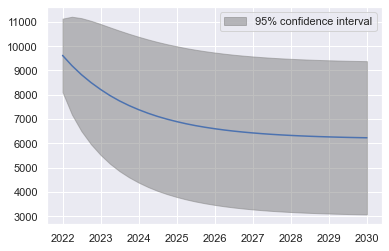

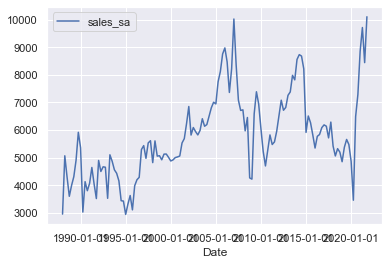

In [210]:
fig, df[['sales_sa']].plot()
fig = res.plot_predict(136,168)



### SARIMAX

In [319]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [432]:
test_df = nat_econ.join(energy).join(df).join(prov_econ).join(covid)

In [433]:
test_df

,"GDP, real, LCU",Unemployment rate,Consumer price index,"Employment, total","Income, personal disposable, real, LCU","Interest rate, central bank policy","Interest rate, 10-Year Benchmark Bond Yield",Interest rate on fixed 5-year mortgages [%],"Corporate borrowing rate, period average","World oil price, Brent crude spot, $pb",...,sales_sa,new_list_act,new_list_sa,RealGDP,RealDisposableIncome,Unemployment,Employment,CPI,COVID-19,Long COVID
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,209975,7.56667,42.2796,10894.5,115511,0.001,0.001,13.8167,4.39358,38.9167,...,NaN,4963.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1980-04-01,209908,7.73333,43.4352,10922.3,116036,0.001,0.001,14.6167,4.81479,38.2167,...,NaN,5462.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1980-07-01,209667,7.5,44.6358,10985.7,116671,0.001,0.001,13.6767,6.79505,34.8,...,NaN,5386.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1980-10-01,212561,7.26667,45.9055,11116.7,118400,0.001,0.001,15.1567,8.25451,39.6333,...,NaN,3933.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1981-01-01,217246,7.4,47.4281,11256.2,120058,0.001,0.001,15.3967,9.51946,39.1167,...,NaN,5984.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030-10-01,626874,6.14529,167.436,20465.4,384475,2.25,3.17968,5.29456,4.62951,72.2137,...,NaN,NaN,NaN,443518.991283,196865.076648,7.449761,2681.132009,185.766696,NaN,NaN
2031-01-01,NaN,NaN,NaN,NaN,NaN,2.25,3.17789,5.29341,NaN,NaN,...,NaN,NaN,NaN,446062.788990,198131.541324,7.450970,2691.908079,186.652715,NaN,NaN
2031-04-01,NaN,NaN,NaN,NaN,NaN,2.25,3.17603,5.29216,NaN,NaN,...,NaN,NaN,NaN,448636.526604,199487.861585,7.444424,2702.917741,187.527261,NaN,NaN


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 1312.121


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


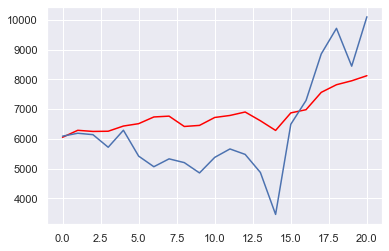

In [395]:
history_df=test_df['1988':'2021']
val = np.array(history_df[['sales_sa']].values,dtype=float)
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = np.array(history_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19']].values,dtype=float)
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
exog_train = np.array(exog_train, dtype=float)
predictions = list()
model = SARIMAX(history,order=(5,1,3), seasonal_order=(0,0,0,0),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [394]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(5, 1, 3)   Log Likelihood                -926.454
Date:                Wed, 16 Feb 2022   AIC                           1876.908
Time:                        22:03:03   BIC                           1910.156
Sample:                             0   HQIC                          1890.408
                                - 119                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            27.2598      5.475      4.979      0.000      16.530      37.990
x2          -587.6673    141.702     -4.147      0.000    -865.398    -309.937
const               0   7.61e+04          0      1.000   -1.49e+05    1.49e+05
ar.L1         -0.3391      0.103     -3.299      0.001      -0.541      -0.138
ar.L2          0.1521      0.138      1.099      0.272      -0.119       0.424
ar.L3          0.8681      0.122      7.117      0.000       0.629       1.107
ar.L4          0.0379      0.087      0.433      0.665      -0.134       0.209
ar.L5          0.0740      0.108      0.685      0.493      -0.138       0.285
ma.L1          0.3338      0.682      0.490      0.624      -1.002       1.670
ma.L2         -0.3439      0.927     -0.371      0.711      -2.161       1.473
ma.L3         -0.9850      0.758     -1.300      0.194      -2.470       0.500
sigma2      3.413e+05    2.3e+05      1.487      0.137   -1.09e+05    7.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 6.95
Prob(Q):                              0.27   Prob(JB):                         0.03
Heteroskedasticity (H):               0.83   Skew:                             0.14
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [374]:
forecast_accuracy(output.summary_frame()['mean'],np.ndarray.flatten(test))

C:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
C:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


{'mape': 0.19515272111058496,
 'mean error': 510.6899920154955,
 'mae': 1082.6368431747626,
 'mean percentage error': 0.1338335353852139,
 'rmse': 1312.1211021099289,
 'corr': 0.8397778296236139,
 'minmax': 0.1519041999108891}

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


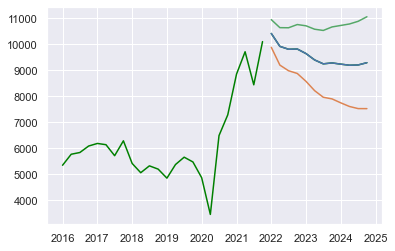

In [483]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2016':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

In [477]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  136
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1056.301
Date:                           Wed, 16 Feb 2022   AIC                           2130.602
Time:                                   22:26:06   BIC                           2156.479
Sample:                                        0   HQIC                          2141.117
                                           - 136                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.3016      4.474      6.996      0.000      22.532      40.071
x2          -651.1353     87.975     -7.401      0.000    -823.564    -478.707
x3          -533.4057    375.107     -1.422      0.155   -1268.602     201.790
ar.L1          0.6310      0.408      1.545      0.122      -0.169       1.431
ar.L2         -0.0979      0.078     -1.262      0.207      -0.250       0.054
ar.L3          0.1723      0.091      1.885      0.059      -0.007       0.352
ma.L1         -0.7163      0.409     -1.751      0.080      -1.518       0.086
ma.S.L4       -0.9508      0.059    -16.010      0.000      -1.067      -0.834
sigma2      3.968e+05   3.31e+04     11.987      0.000    3.32e+05    4.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.89
Prob(Q):                              0.82   Prob(JB):                         0.09
Heteroskedasticity (H):               0.90   Skew:                            -0.10
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [478]:
history[-12:]

,sales_sa,mean
2022-01-01,NaN,10414.731477
2022-04-01,NaN,9918.434116
2022-07-01,NaN,9807.779821
2022-10-01,NaN,9817.332109
2023-01-01,NaN,9640.340410
2023-04-01,NaN,9396.974933
2023-07-01,NaN,9246.558909
2023-10-01,NaN,9282.618149
2024-01-01,NaN,9234.736533
2024-04-01,NaN,9193.923277


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


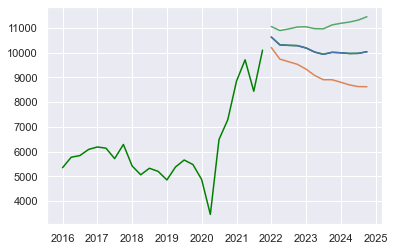

In [482]:
exog =  np.array(test_df[['WTI_CMHC','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_CMHC','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['2022':'2024'].values,dtype=float)

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.5)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='QS-OCT')

history = test_df[['sales_sa']]['2016':]
history=pd.concat([history,fcast_res['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='q')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2022':])

In [480]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  136
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1056.301
Date:                           Wed, 16 Feb 2022   AIC                           2130.602
Time:                                   22:26:09   BIC                           2156.479
Sample:                                        0   HQIC                          2141.117
                                           - 136                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.3016      4.474      6.996      0.000      22.532      40.071
x2          -651.1353     87.975     -7.401      0.000    -823.564    -478.707
x3          -533.4057    375.107     -1.422      0.155   -1268.602     201.790
ar.L1          0.6310      0.408      1.545      0.122      -0.169       1.431
ar.L2         -0.0979      0.078     -1.262      0.207      -0.250       0.054
ar.L3          0.1723      0.091      1.885      0.059      -0.007       0.352
ma.L1         -0.7163      0.409     -1.751      0.080      -1.518       0.086
ma.S.L4       -0.9508      0.059    -16.010      0.000      -1.067      -0.834
sigma2      3.968e+05   3.31e+04     11.987      0.000    3.32e+05    4.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.89
Prob(Q):                              0.82   Prob(JB):                         0.09
Heteroskedasticity (H):               0.90   Skew:                            -0.10
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [481]:
history[-12:]

,sales_sa,0
2022-01-01,NaN,10633.156905
2022-04-01,NaN,10317.369391
2022-07-01,NaN,10297.163776
2022-10-01,NaN,10285.683918
2023-01-01,NaN,10191.680172
2023-04-01,NaN,10026.065270
2023-07-01,NaN,9935.627421
2023-10-01,NaN,10014.871861
2024-01-01,NaN,9996.786515
2024-04-01,NaN,9967.827786


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


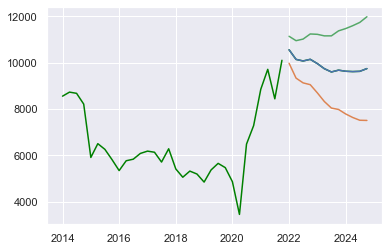

In [486]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2014':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

In [485]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  136
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1054.460
Date:                           Wed, 16 Feb 2022   AIC                           2128.919
Time:                                   22:37:53   BIC                           2157.671
Sample:                                        0   HQIC                          2140.602
                                           - 136                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.1569      6.025      5.171      0.000      19.347      42.966
x2          -684.9055     99.511     -6.883      0.000    -879.943    -489.868
x3          -424.6374    531.114     -0.800      0.424   -1465.602     616.328
x4          -124.3073     84.961     -1.463      0.143    -290.829      42.214
ar.L1          0.6603      0.284      2.323      0.020       0.103       1.218
ar.L2         -0.0951      0.086     -1.110      0.267      -0.263       0.073
ar.L3          0.1796      0.087      2.060      0.039       0.009       0.351
ma.L1         -0.6972      0.281     -2.477      0.013      -1.249      -0.146
ma.S.L4       -0.9368      0.066    -14.290      0.000      -1.065      -0.808
sigma2      4.759e+05   4.97e+04      9.577      0.000    3.79e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 5.33
Prob(Q):                              0.68   Prob(JB):                         0.07
Heteroskedasticity (H):               0.70   Skew:                            -0.21
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order

In [2]:
tsa.ardl

AttributeError: module 'statsmodels.tsa.api' has no attribute 'ardl'

In [1]:
import statsmodels

In [2]:
statsmodels.__version__

'0.13.2'